In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate
import scipy.interpolate
import sympy as sym
import math

# Stommel 2-box model 

### Coupled ODEs describing the model can be written in non-dimensional as below:

$$ \dot{T} = \eta_1 - T(1+|T-S|) $$

$$ \dot{S} = \eta_2 - S(\eta_3 + |T-S|) $$

where T is Temperature gradient and S is corresponding salinity gradient. There are three non-negative
dimensionless parameters: η1 and η2 represent the relative strength of thermal and freshwater
forcing and η3 is the ratio of thermal to freshwater surface restoring times.


In [3]:
#fixing parameters n1 and n3. parameter n2 can be varied
n1 = 3.0
n3 = 0.3

In [4]:
#model function

def stommel(v,t, n2):
    T,S = v
    T_dot = n1 - T*(1+np.abs((T-S)))
    S_dot = n2 - S*(n3+np.abs((T-S)))
    return ([T_dot,S_dot])


In [9]:
def plot_nullclines(n2):
    x = np.arange(1,5,0.05)
    x_1=[]
    x_2=[]
    x_3=[]
    x_4=[]
    x_5=[]
    x_6=[]
    for i in x:
        y_1 = i+1-n1/i
        y_2 = i-1+n1/i
        if i>y_1 and i<y_2:
            x_1.append([i,y_1])
            x_2.append([i,y_2])
        if (i+n3)**2-4*n2>=0 and (i-n3)**2+4*n2>=0 :
            y_3 = 0.5*(i+n3-(np.sqrt((i+n3)**2-4*n2)))
            y_4 = 0.5*(i+n3+(np.sqrt((i+n3)**2-4*n2)))
            y_5 = 0.5*(i-n3+(np.sqrt((i-n3)**2+4*n2)))
            y_6 = 0.5*(i-n3-(np.sqrt((i-n3)**2+4*n2)))
            x_3.append([i,y_3])
            x_4.append([i,y_4])
            x_5.append([i,y_5])
            x_6.append([i,y_6])
    
            
    
    aplot1 = [i[0] for i in x_1]
    xplot1 = [i[1] for i in x_1]
    aplot2 = [i[0] for i in x_2]
    xplot2 = [i[1] for i in x_2]
    aplot3 = [i[0] for i in x_3]
    xplot3 = [i[1] for i in x_3]
    aplot4 = [i[0] for i in x_4]
    xplot4 = [i[1] for i in x_4]
    aplot5 = [i[0] for i in x_5]
    xplot5 = [i[1] for i in x_5]
    aplot6 = [i[0] for i in x_6]
    xplot6 = [i[1] for i in x_6]
       
    plt.plot(aplot1,xplot1,label='$\dot{T}=0$')  
    plt.plot(aplot2,xplot2,label='$\dot{T}=0$')
    plt.plot(aplot3,xplot3,label='$\dot{S}=0$')
    plt.plot(aplot4,xplot4,label='$\dot{S}=0$')
    plt.plot(aplot5,xplot5,label='$\dot{S}=0$')
    plt.plot(aplot6,xplot6,label='$\dot{S}=0$')

In [10]:
#flow function

def plot_flow(n2):
    
    #define the range of t and s
    tt = np.arange(0,5,0.1)
    ss = np.arange(-3,5,0.1)
    
    #create a mesh of points
    (TT,SS) = np.meshgrid(tt,ss)
    
    #calculate the derivative at each point on the mesh
    dT = n1 - TT*(1+np.abs(TT-SS))
    dS = n2 - SS*(n3+np.abs(TT-SS))
    vel = np.sqrt(dT**2 + dS**2)
    
    #use quiver function to plot the flow field
    plt.quiver(TT, SS, dT, dS, vel)

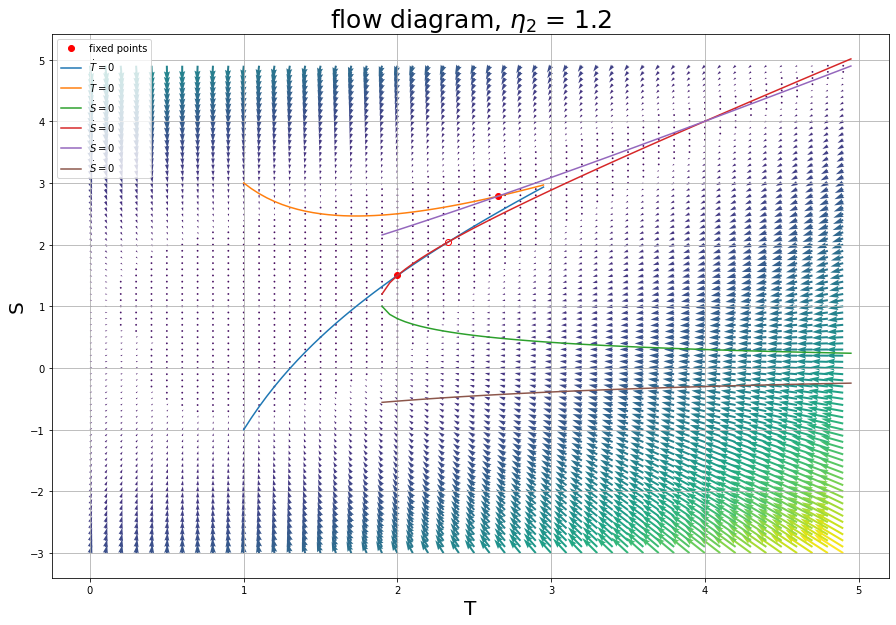

In [11]:
#plotting flow for a particular n2 say 1.2

n2 = 1.2

plt.figure(figsize = (15, 10))
plt.title("flow diagram, $\eta_2$ = 1.2",fontsize=25)
plt.plot(2.6521975355168936, 2.7833350016465883,'ro', label='fixed points')
plt.plot(2,1.5,'ro')
plt.plot(2.330216161508128, 2.0427819528043374,'ro',fillstyle='none')
plt.xlabel('T',fontsize=20)
plt.ylabel('S',fontsize=20)
plot_flow(n2)
plot_nullclines(n2)
plt.grid()
plt.legend()
plt.show()

In [12]:
t=np.arange(0,10,0.001) #time
v0 = [4 , 4] #initial condition
args = (n2,) 
sol=sp.integrate.odeint(stommel, v0, t, args)

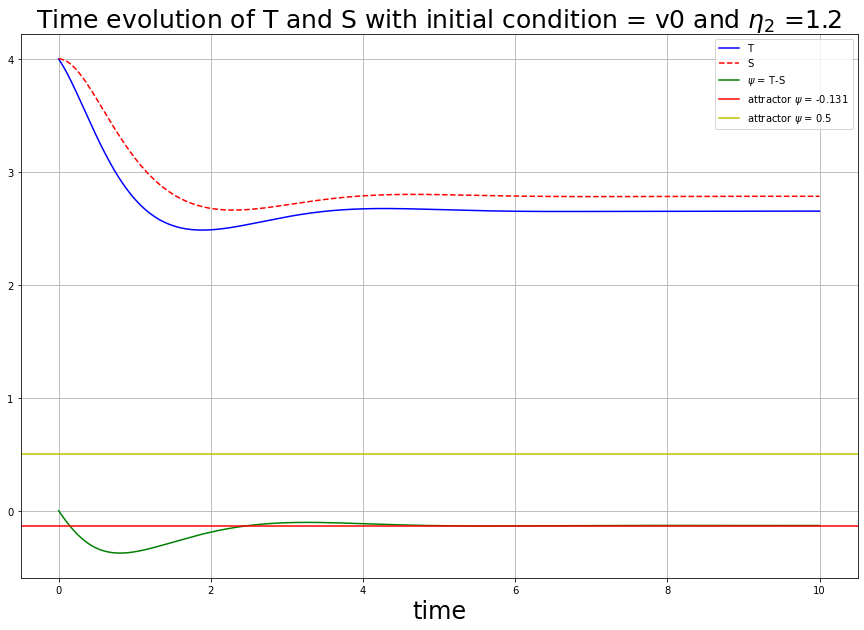

In [13]:
#Plotting IVP with n2=0.9 and v0

plt.figure(figsize = (15, 10))
plt.title("Time evolution of T and S with initial condition = v0 and $\eta_2$ =1.2",fontsize=25)
plt.plot(t,sol[:,0],'b-',label='T')
plt.plot(t,sol[:,1],'r--',label='S')
plt.plot(t,sol[:,0]-sol[:,1],'g',label='$\psi$ = T-S')
plt.axhline(y = -0.131137, color = 'r', linestyle = '-', label = 'attractor $\psi$ = -0.131' )
plt.axhline(y = 0.5, color = 'y', linestyle = '-', label = 'attractor $\psi$ = 0.5' )
plt.xlabel('time',fontsize=24)
plt.legend(loc='best')
plt.grid()
plt.show()

In [471]:
#function to find fixed points or equilibrium points. Arg : n2, returns: fixed points (T,S)

def fp(n2):
    fp=[]
    coeff = [1-n3,n2-n1-n3+1,n1*n3-2*n1,n1**2] #x>y case when $\dot{v}$ is zero
    coeff1 = [1-n3,n2-n1+n3-1,-n1*n3+2*n1,-n1**2] #x<y case when $\dot{v}$ is zero
    for x in np.roots(coeff):
        y = x + 1 - n1/x
        z= x-y
        if np.isreal(x) and x >= 0 and y>=0 and x>y: #taking only non negative real values
            fp.append([x,y])
    for x in np.roots(coeff1):
        y = x - 1 + n1/x
        z= x-y
        if np.isreal(x) and x >= 0 and y>=0 and x<y:
            fp.append([x,y])
    return fp

fp(1.2) # fixed point for particular case n2=1.2

[[2.330216161508128, 2.0427819528043374],
 [1.9999999999999982, 1.499999999999997],
 [(2.6521975355168936+0j), (2.7833350016465883+0j)]]

In [6]:
# Jacobian for stommel equations

def stommel_jac(fp):
    """ Arg: fp : fixed point [T,S], returns Jacobian
    J determined analytically by taking partial derivatives
    """
    t = fp[0]
    s = fp[1]
    phi = np.sign(t-s)
    return np.array([[-1 + (-2*t + s)*phi, t*phi],[-s*phi, -n3 + (2*s - t)*phi ]]) 

In [7]:
def stability(eigv):
    """ Linear Stability of the equilibrium given its associated 2x2 jacobian matrix. 
    Arg: eigen values of jacobian, returns: nature of stability
    """
    if all(np.real(eigv)==0) and all(np.imag(eigv)!=0):
        nature = "Center" 
    elif np.real(eigv)[0]*np.real(eigv)[1]<0:
        nature = "Saddle"
    else: 
        stability = 'Unstable' if all(np.real(eigv)>0) else 'Stable'
        nature = stability + (' spiral' if all(np.imag(eigv)!=0) else ' node')
    return nature

In [328]:
# Stability analysis of system with n2=1.2

for i in fp(1.2):
    jacobian = stommel_jac(i)
    print("Jacobian matrix at fixed point {} = {}".format(i, jacobian))
    eigv = np.linalg.eigvals(jacobian)
    print("Eigenvalues = {}".format(eigv))
    print("Nature of fixed point:",stability(eigv))

Jacobian matrix at fixed point [2.330216161508128, 2.0427819528043374] = [[-3.61765037  2.33021616]
 [-2.04278195  1.45534774]]
Eigenvalues = [-2.37486842  0.21256579]
Nature of fixed point: Saddle
Jacobian matrix at fixed point [1.9999999999999982, 1.499999999999997] = [[-3.5  2. ]
 [-1.5  0.7]]
Eigenvalues = [-2.58743421 -0.21256579]
Nature of fixed point: Stable node
Jacobian matrix at fixed point [(2.6521975355168936+0j), (2.7833350016465883+0j)] = [[ 1.52106007+0.j -2.65219754+0.j]
 [ 2.783335  +0.j -3.21447247+0.j]]
Eigenvalues = [-0.8467062+1.33253035j -0.8467062-1.33253035j]
Nature of fixed point: Stable spiral


In [321]:
#Define psi = T-S. varying n2 and plotting corresponding psi values to study bifurcation

n2s = np.arange(0.01,2,0.0001) #an array of n2

#psi intitialization
psi1=[] #corresponding to first real & positive root/fixedpoint.
psi2=[] #corresponding to second real & positive root (if any)
psi3=[] #corresponding to third real & positive root (if any)


for n in n2s:
    fixp = fp(n) #finding fixed point corresponding to n
    l=len(fixp) #to find number of fixed point(s) for given n
    if l==1:
        psi1.append([n,fixp[0][0]-fixp[0][1]])
    elif l==2:
        psi1.append([n,fixp[0][0]-fixp[0][1]])
        psi2.append([n,fixp[1][0]-fixp[1][1]])
    elif l==3:
        psi1.append([n,fixp[0][0]-fixp[0][1]])
        psi2.append([n,fixp[1][0]-fixp[1][1]])
        psi3.append([n,fixp[2][0]-fixp[2][1]])

#to find bifurcation points
print(psi2[0],psi2[-1]) #first and last element of psi2 
print(psi3[0],psi3[-1])

[0.9000999999999946, 0.8407317183156335] [1.2200999999999926, 0.3948738350439722]
[0.9000999999999946, (-4.166746235068075e-05+0j)] [1.2200999999999926, (-0.14027565001334974+0j)]


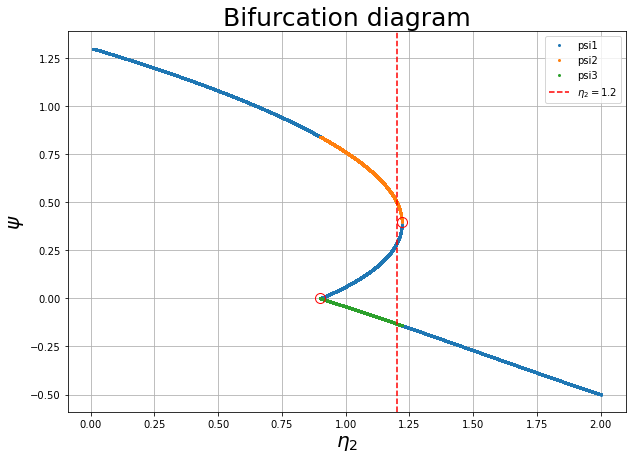

In [474]:
plt.figure(figsize = (10, 7))
plt.title("Bifurcation diagram",fontsize=25)
plt.xlabel("$\eta_2$",fontsize=20)
plt.ylabel("$\psi$",fontsize=20)

aplot1 = [i[0] for i in psi1]
xplot1 = [i[1] for i in psi1]
aplot2 = [i[0] for i in psi2]
xplot2 = [i[1] for i in psi2]
aplot3 = [i[0] for i in psi3]
xplot3 = [i[1] for i in psi3]
plt.plot(aplot1,xplot1,'o', markersize='2', label = 'psi1' )  
plt.plot(aplot2,xplot2,'o',markersize='2', label = 'psi2')
plt.plot(aplot3,xplot3,'o',markersize='2', label = 'psi3')
plt.plot(0.9000999999999946, (-4.166746235068075e-05),'ro',markersize=10,fillstyle='none')
plt.plot(1.2200999999999926, 0.3948738350439722,'ro',markersize=10,fillstyle='none')

plt.axvline(x=1.2,color='r',linestyle='--', label='$\eta_2 = 1.2$')
plt.legend()
plt.grid()
plt.show()

#note : colours do not represent stability but merely help us identify bifurcation points from array

## Resilience Indicators

### Amplification evelope

LinregressResult(slope=(-0.8467061991945415+0.007767764705571308j), intercept=(-7.105427357601002e-15+1.438232231586551j), rvalue=(-0.9892808784700188+0.009075758626765856j), pvalue=0.0, stderr=(0.000850298140416941+0.00030942279752018185j))
LinregressResult(slope=-0.21256579129621084, intercept=-8.881784197001252e-16, rvalue=-1.0, pvalue=0.0, stderr=0.0)


C:\Users\Assain\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


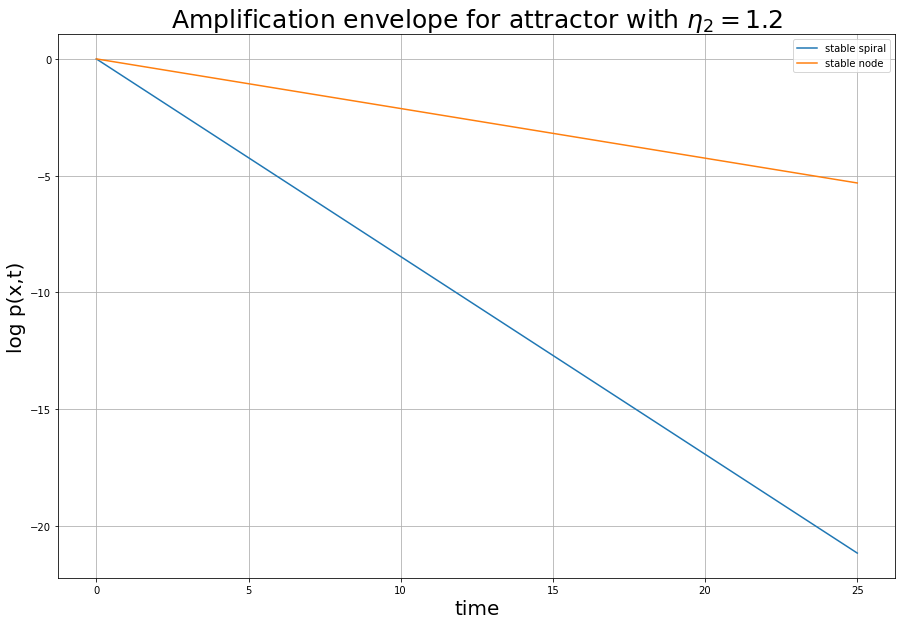

In [476]:
n2=1.2
t=np.arange(0,25,0.001)

def p(fp,n2,t):
    return max(np.linalg.eigvals(sp.linalg.expm(stommel_jac(fp)*t)))

ps1 = []
ps2 = []
for i in t:
    ps1.append(p([2.6521975355168936, 2.7833350016465883],1.2,i))
    ps2.append(p([1.9999999999999982, 1.499999999999997],1.2,i))
    
from scipy.stats import linregress
print(linregress(t, np.log(ps1)))
print(linregress(t, np.log(ps2)))

plt.figure(figsize=(15,10))
plt.plot(t, np.log(ps1), label='stable spiral')
plt.plot(t, np.log(ps2), label='stable node')
plt.xlabel('time',fontsize=20)
plt.ylabel('log p(x,t)',fontsize=20)
plt.title('Amplification envelope for attractor with $\eta_2 = 1.2$',fontsize=25)
plt.legend(loc='best')
#ax = plt.gca()
#ax.set_yscale('log')
plt.grid()
plt.show()


In [433]:
np.linalg.svd(sp.linalg.expm(stommel_jac([2,1,5])*2))

(array([[-0.54581694, -0.83790445],
        [-0.83790445,  0.54581694]]),
 array([0.23560758, 0.00078141]),
 array([[ 0.30829487, -0.95129085],
        [-0.95129085, -0.30829487]]))

#### Lattitude in volume

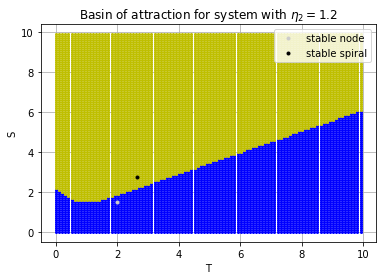

In [329]:
def solution(x,y):
    return sp.integrate.odeint(stommel, [x,y], t, args)

basin1=[]
basin2=[]
plt.figure()
for i in np.arange(0.01,10,0.1):
    for j in np.arange(0.01,10,0.1):
        sol = solution(i,j)[-1]
        if all(abs(sol - [2.6521975355168936, 2.7833350016465883]) < np.array([0.1])):
            basin2.append([[i,j],"r"])
            plt.plot(i,j,'o', markersize='2', color='y')  
        elif all(abs(sol - [1.9999,1.4999]) < np.array([0.1])) :
            basin1.append([[i,j],"b"])
            plt.plot(i,j,'o', markersize='2', color='b')
            
plt.plot(1.9999, 1.4999,'o',markersize='3',color='0.8', label='stable node')
plt.plot(2.6521975355168936, 2.7833350016465883,'o', color='black',markersize='3', label='stable spiral')
plt.xlabel('T')
plt.ylabel('S')
plt.title('Basin of attraction for system with $\eta_2 = 1.2$')
plt.grid()
plt.legend(loc='best')
plt.show()
            
        

In [330]:
#basin 1 is basin of attraction for T,S=[2,1.5] i.e; "on" state equilibrium point

L_v1 = len(basin1)/(len(basin1)+len(basin2)) #blue #node
L_v2 = len(basin2)/(len(basin1)+len(basin2)) #yellow #spiral
print("Lattitude in volume for basin 1 is",L_v1)
print("Lattitude in volume for basin 2 is",L_v2)


Lattitude in volume for basin 1 is 0.3566
Lattitude in volume for basin 2 is 0.6434


### Distance to threshold

In [331]:
DT_1 = np.min([np.linalg.norm(i[0]-np.array([1.999,1.499])) for i in basin2])
DT_2 = np.min([np.linalg.norm(i[0]-np.array([2.6521975355168936, 2.7833350016465883])) for i in basin1])
print("Distance to threshold for stable node",DT_1)
print("Distance to threshold for stable spiral",DT_2)
     


Distance to threshold for stable node 0.3639258166165187
Distance to threshold for stable spiral 0.5389880652457336


### Return time

In [337]:
""" Return time of system from a perturbed point [2.61, 2.81] to its attractor at [2.6521975355168936, 2.7833350016465883]"""


u1=stommel([2.61, 2.81],1,n2)
d1=sp.spatial.distance.directed_hausdorff(np.array([[2.61, 2.81]]),np.array([[2.6521975355168936, 2.7833350016465883]]),seed=0)[0]
dist=((sp.spatial.distance.directed_hausdorff([u1],[[2.6521975355168936, 2.7833350016465883]],seed=0))[0])/d1


print("Return time RT(A=stable spiral,x_p=[2.61, 2.81]) for n2 = 1.2 is : ",dist)


    

Return time RT(A=stable spiral,x_p=[2.61, 2.81]) for n2 = 1.2 is :  81.82366028279438


In [351]:
s1=[]
t1=[]
c1=[]
s2=[]
t2=[]
c2=[]

for i in basin1:
    pi1=np.array(i[0])
    v1=np.array([1.9999,1.4999])
    d1=sp.spatial.distance.directed_hausdorff([pi1],[v1],seed=0)[0]
    u1=sp.integrate.odeint(stommel, i[0], t, args)
    d_i1=[]
    for u in u1:
        d_i1.append(sp.spatial.distance.directed_hausdorff([u],[v1],seed=0)[0]*0.001)
    t1.append(i[0][0])
    s1.append(i[0][1])
    c1.append((np.sum(d_i1))/d1)
    
x1=np.array(t1)
y1=np.array(s1)
z1 = np.array(c1)
    
for i in basin2:
    pi2=np.array(i[0])
    v2=np.array([2.6521975355168936, 2.7833350016465883])
    d2=sp.spatial.distance.directed_hausdorff([pi2],[v2],seed=0)[0]
    u2=sp.integrate.odeint(stommel, i[0], t, args)
    d_i2=[]
    for u in u2:
        d_i2.append(sp.spatial.distance.directed_hausdorff([u],[v2],seed=0)[0]*0.001)
    t2.append(i[0][0])
    s2.append(i[0][1])
    c2.append((np.sum(d_i2))/d2)

x2=np.array(t2)
y2=np.array(s2)
z2 = np.array(c2)

In [338]:
soln=sp.integrate.odeint(stommel, [3.01 , 2.41], t, args)
dtest=[]
dnorm=sp.spatial.distance.directed_hausdorff(np.array([[3.01 , 2.41]]),np.array([[2.65219262, 2.78333695]]),seed=0)[0]
for i in soln:
    dtest.append(sp.spatial.distance.directed_hausdorff([i],np.array([[2.65219262, 2.78333695]]),seed=0)[0]*0.001)
soln[-1]

array([2.65219754, 2.783335  ])

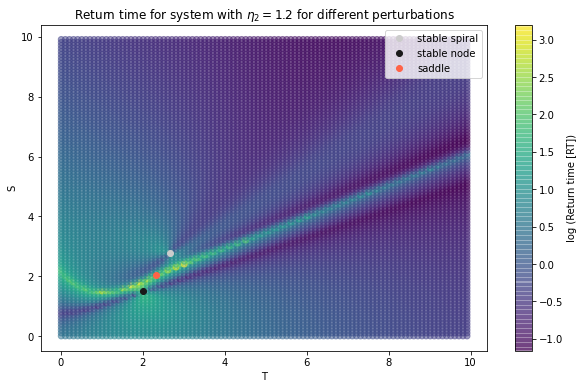

In [389]:

plt.figure(figsize=(10,6))
    
plt.scatter(x1, y1, c=np.log(z1), alpha=0.5)
plt.scatter(x2, y2, c=np.log(z2), alpha=0.5)

plt.plot(2.6521975355168936, 2.7833350016465883,'o', color='0.8',markersize='6', label='stable spiral')
plt.plot(1.999, 1.4999,'o',markersize='6',color='0.1', label='stable node')
plt.plot(2.330216161508128, 2.0427819528043374,'o',markersize='6',color='tomato', label='saddle')
plt.xlabel('T')
plt.ylabel('S')
plt.title('Return time for system with $\eta_2 = 1.2$ for different perturbations')
cbar=plt.colorbar()
ax=cbar.ax
ax.set_ylabel('log (Return time [RT])')
plt.legend()
plt.show()


In [ ]:
print(x2[2435],y2[2435])

#### Distance to Bifurcation

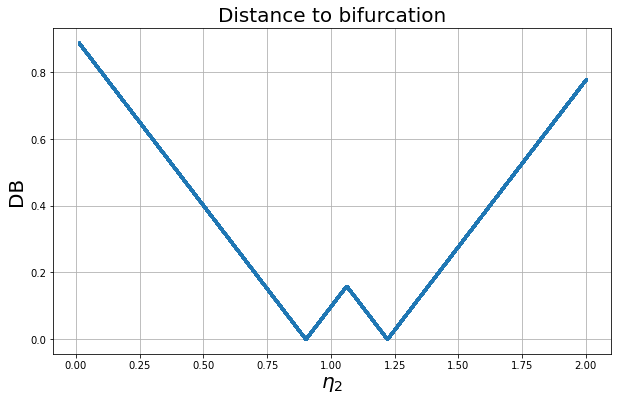

In [478]:
""" Args: n2, returns: [dist to bifurcation, nearest bifurcation point] """

def DB(n2):
    db=np.minimum(np.abs(1.22-n2),np.abs(0.9-n2))
    if np.abs(1.22-n2)<np.abs(0.9-n2):
        return [db,1.22]
    else:
        return [db,0.9]
    
DB1=[]
for n in n2s:
    db1=DB(n)
    DB1.append(db1[0])

plt.figure(figsize=(10,6))
plt.title("Distance to bifurcation",fontsize=20)
plt.xlabel("$\eta_2$",fontsize=20)
plt.ylabel("DB",fontsize=20)
plt.plot(n2s,DB1,'o', markersize='2')
plt.grid()
plt.show()